For understanding how random forest works, please watch this amazing <a href="https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer">Youtube Tutorial</a>

In [2]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# split the data into features and labels
X, y = data.iloc[:,:-1], data.iloc[:,-1:]
print(X.shape, y.shape)
print(X.head())
print(y.head())

(768, 8) (768, 1)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
   Outcome
0        1
1        0
2        1
3        0
4        1


In [9]:
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [10]:
# define the model
model = RandomForestClassifier()

In [12]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)

[0.72727273 0.76623377 0.71428571 0.84415584 0.79220779 0.84415584
 0.75324675 0.74025974 0.80263158 0.72368421 0.7012987  0.71428571
 0.76623377 0.77922078 0.72727273 0.76623377 0.74025974 0.83116883
 0.73684211 0.80263158 0.67532468 0.80519481 0.77922078 0.71428571
 0.77922078 0.74025974 0.77922078 0.72727273 0.73684211 0.80263158]


In [13]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.760 (0.042)


In [14]:
# Now let's split the data into test and train chunks to better analyze the performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [25]:
clf = model.fit(X_train,np.ravel(y_train)) # np.ravel to convery y_train's shape from (537, 1) to (537,)

In [28]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


As expected accuracy of Random Forest (78%) is better than Decision Trees (71%), Decision Trees implementation can be found <a href="https://github.com/riazsajidgit/decision-trees-understanding/blob/master/decision-tree-implementation.ipynb">Here</a>

In [31]:
# Let's Draw the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)
print(cm)

[[130  16]
 [ 34  51]]


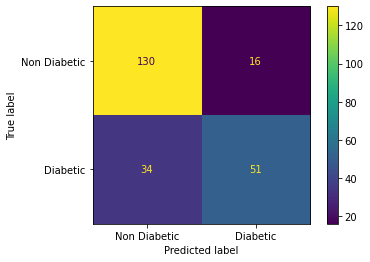

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Diabetic", "Diabetic"])
disp.plot()

In [33]:
print(classification_report(y_test,y_pred,target_names=["Non Diabetic", "Diabetic"]))

              precision    recall  f1-score   support

Non Diabetic       0.79      0.89      0.84       146
    Diabetic       0.76      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

